In [1]:
import sys
import pandas as pd
import copy
import numpy as np
import matplotlib as mpl
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import datetime
import itertools
sys.path.append("C:/dev/pyktrader3/")
from pycmqlib3.utility import misc
from bktest import backtest
import pycmqlib3.analytics.data_handler as dh

In [2]:
ferrous_products_mkts = ['rb', 'hc', 'i', 'j', 'jm']
ferrous_mixed_mkts = ['ru', 'FG', 'ZC', 'SM', "SF"]
base_metal_mkts = ['cu', 'al', 'zn', 'pb', 'ni', 'sn']
precious_metal_mkts = ['au', 'ag']
ind_metal_mkts = ferrous_products_mkts + ferrous_mixed_mkts + base_metal_mkts  
petro_chem_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc', 'fu', 'eg']
ind_all_mkts = ind_metal_mkts + petro_chem_mkts
ags_oil_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs'] #, 'b']
ags_soft_mkts = ['CF', 'SR', 'jd', 'AP'] #, 'sp', 'CJ', 'UR']
ags_all_mkts = ags_oil_mkts + ags_soft_mkts
eq_fut_mkts = ['IF', 'IH', 'IC']
bond_fut_mkts = ['T', 'TF']
fin_all_mkts = eq_fut_mkts + bond_fut_mkts
commod_all_mkts = ind_all_mkts + ags_all_mkts + precious_metal_mkts
all_markets = commod_all_mkts + fin_all_mkts
daily_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 1), 'lu': datetime.date(2020, 8, 1),}
min_start_dict = { 'c': datetime.date(2011,1,1), 'm': datetime.date(2011,1,1),
    'y': datetime.date(2011,1,1), 'l': datetime.date(2011,1,1), 'rb':datetime.date(2011,1,1),
    'p': datetime.date(2011,1,1), 'cu':datetime.date(2011,1,1), 'al':datetime.date(2011,1,1),
    'zn':datetime.date(2011,1,1), 'au':datetime.date(2011,1,1), 'v': datetime.date(2011,1,1),
    'a': datetime.date(2011,1,1), 'ru':datetime.date(2011,1,1), 'ag':datetime.date(2012,6,1),
    'i': datetime.date(2014,1,1), 'j': datetime.date(2012,6,1), 'jm':datetime.date(2013,7,1),
    'CF':datetime.date(2012,5,1),  'TA':datetime.date(2012,4,15),
    'PM':datetime.date(2013,10,1), 'RM':datetime.date(2013,1,1),  'SR':datetime.date(2013,1,1),
    'FG':datetime.date(2013,1,1),  'OI':datetime.date(2013,5,1),  'RI':datetime.date(2013,1,1),
    'WH':datetime.date(2014,5,1),  'pp':datetime.date(2014,5,1),
    'IF':datetime.date(2010,5,1),  'MA':datetime.date(2012,1,1),  'TF':datetime.date(2014,6,1),
    'IH':datetime.date(2015,5,1),  'IC':datetime.date(2015,5,1),  'cs':datetime.date(2015,2,1),
    'jd':datetime.date(2014,5,1),  'ni':datetime.date(2015,5,1),  'sn':datetime.date(2017,4,1),
    'ZC':datetime.date(2013,11,1), 'hc':datetime.date(2016, 4, 1), 'SM': datetime.date(2017,1,1),
    'SF': datetime.date(2017,9,1), 'CY': datetime.date(2017, 9, 1), 'AP': datetime.date(2018, 1, 1),
    'TS': datetime.date(2018, 9, 1), 'fu': datetime.date(2018, 9, 1), 'sc': datetime.date(2018, 8, 1),
    'b': datetime.date(2018, 1, 1), 'pb': datetime.date(2016, 7, 1), 'bu': datetime.date(2015,9,15),
    'T':datetime.date(2015,6,1), 'ss': datetime.date(2020, 5, 1), 'sp': datetime.date(2019, 5, 1),
    'CJ': datetime.date(2019, 8, 9), 'UR': datetime.date(2019, 8, 9), 'SA': datetime.date(2020, 1, 1),
    'eb': datetime.date(2020, 1, 1), 'eg': datetime.date(2019, 5, 1), 'rr': datetime.date(2019, 9, 1),
    'pg': datetime.date(2020, 9, 1), 'lu': datetime.date(2020, 8, 1),}

In [4]:
field_list = ['open', 'high', 'low', 'close', 'volume', 'openInterest', 'contract', 'shift']
factor_list = ['lrstd','upstd','lrskew','lrkurt','mincnt','volmf','oimf','trdstr','volmfratio']
shared_cols = ['date', 'split_idx']
start_date = datetime.date(2011, 1, 1)
end_date = datetime.date(2021, 5, 20)
pnl_tenors = ['1y', '2y', '3y', '4y', '5y', '6y', '8y', '10y']

delimiter = '-'
atr_win = 20
file_folder = "C:\\dev\\data\\data_cache\\"

sim_products = ind_all_mkts + ags_all_mkts
need_shift = 1
freq = 'd'

if freq == 'd':
    sim_start_dict = daily_start_dict
else:
    sim_start_dict = min_start_dict
    
dbtbl_prefix = ''
args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
ferrous_products_args = args
ferro_mixed_mkt_args = args
base_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
base2_args = {'roll_rule': '-40b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
v_args  = {'roll_rule': '-28b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
sc_args = {'roll_rule': '-20b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
eq_args = {'roll_rule': '-1b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
bond_args = {'roll_rule': '-30b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}
precious_args = {'roll_rule': '-25b', 'freq': freq, 'need_shift': need_shift, 'dbtbl_prefix': dbtbl_prefix}

df_list = []

for idx, asset in enumerate(sim_products):
    use_args = copy.copy(args)
    if asset in eq_fut_mkts:
        use_args = eq_args
    elif asset in ['cu', 'al', 'zn', 'pb', 'sn']:
        use_args = base_args
    elif asset in ['ni']:
        use_args = base2_args
    elif asset in ['sc']:
        use_args = sc_args
    elif asset in ['v']:
        use_args = v_args
    elif asset in bond_fut_mkts:
        use_args = bond_args
    elif asset in precious_metal_mkts:
        use_args = precious_args
    use_args['start_date'] = max(sim_start_dict.get(asset, start_date), start_date)
    use_args['end_date'] = end_date        
    for idy, nb in enumerate([1, 2]):
        if freq == 'd':
            use_args['n'] = nb
            print("loading mkt = %s, nb = %s, args = %s" % (asset, nb, use_args))
            df = misc.nearby(asset, **use_args)
            df.index.name = 'date'
            xdf = df[field_list]
        else:
            filename = "%s_%s_%s_%s.csv" % (asset, nb, freq, end_date.strftime("%Y%m%d"))
            df = pd.read_csv(file_folder + filename, index_col=0)
            df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))            
            df['datetime'] = df['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
            df = df.drop_duplicates(subset=['date', 'split_idx'], keep='last').set_index(['date', 'split_idx'])
            df = df.drop(['cum_idx'], axis=1)
            ep_field = [ col for col in df.columns if 'exec_price' in col]
            xdf = df[field_list + ep_field + factor_list]
            #xdf['expiry'] = xdf['contract'].apply(lambda x: misc.contract_expiry(x, misc.CHN_Holidays))
        xdf['contmth'] = xdf['contract'].apply(lambda x: misc.inst2contmth(x))
        xdf['mth'] = xdf['contmth'].apply(lambda x: x//100 * 12 + x % 100)        
        xdf.columns = [delimiter.join((asset+str(nb), col)) for col in xdf.columns]
        df_list.append(xdf)

df = pd.concat(df_list, axis = 1, sort = False).sort_index()
if freq == 'd':
    df.index.name = 'date'
df = df.reset_index()
if freq != 'd':
    df['date'] = df['date'].dt.date

print(df.tail(20))


loading mkt = rb, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2021, 5, 20), 'n': 1}
loading mkt = rb, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2011, 1, 1), 'end_date': datetime.date(2021, 5, 20), 'n': 2}
loading mkt = hc, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2021, 5, 20), 'n': 1}
loading mkt = hc, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2016, 4, 1), 'end_date': datetime.date(2021, 5, 20), 'n': 2}
loading mkt = i, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2014, 1, 1), 'end_date': datetime.date(2021, 5, 20), 'n': 1}
loading mkt = i, nb = 2, args =

loading mkt = bu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2015, 9, 15), 'end_date': datetime.date(2021, 5, 20), 'n': 1}
loading mkt = bu, nb = 2, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2015, 9, 15), 'end_date': datetime.date(2021, 5, 20), 'n': 2}
loading mkt = sc, nb = 1, args = {'roll_rule': '-20b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 8, 1), 'end_date': datetime.date(2021, 5, 20), 'n': 1}
loading mkt = sc, nb = 2, args = {'roll_rule': '-20b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 8, 1), 'end_date': datetime.date(2021, 5, 20), 'n': 2}
loading mkt = fu, nb = 1, args = {'roll_rule': '-30b', 'freq': 'd', 'need_shift': 1, 'dbtbl_prefix': '', 'start_date': datetime.date(2018, 9, 1), 'end_date': datetime.date(2021, 5, 20), 'n': 1}
loading mkt = fu, nb = 2, ar

In [5]:
def run_ts_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    run_mode = input_args.get('run_mode', "ryield")
    params = input_args.get('params', [0.0, 0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    exec_field = input_args.get('exec_field', 'open')
    select_cols = []
    data_field = ''
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))    
    
    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date']>= start_date]
    if end_date:
        xdf = xdf[xdf['date']<= end_date]
    for asset in product_list:
        if need_shift == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif need_shift == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win) - 0.5 
        
        for field in reverse_list:
            if field in run_mode:                
                if delimiter.join((asset + str(1), field)) in xdf.columns:
                    xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
                else:
                    print("Field=%s is not in dataframe." % field)
                break      

        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'clbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'clbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)
        elif 'hlbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'high'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'low'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'hlbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)                    
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x)) 
        data_field = run_mode
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if need_shift == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif need_shift == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        if 'sma' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == run_mode[-3:]:   
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nma' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        if pos_func:
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), data_field))].apply(lambda x: pos_func(x, **pos_args))

    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    adf = xdf[select_cols].copy()
    fdf = adf[[delimiter.join((asset, data_field)) for asset in mod_prod_list]]
    adf['prod_count'] = fdf.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1)
    adf['rebal_seqno'] = range(len(adf.index))
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            pflag = (adf[delimiter.join((asset, data_field))] >= 0) & rebal_flag
            nflag = (adf[delimiter.join((asset, data_field))] <= 0) & rebal_flag
            long_tmp.loc[pflag, asset] = adf.loc[pflag, delimiter.join((asset, data_field))]
            long_tmp.loc[nflag, asset] = 0.0
            short_tmp.loc[nflag, asset] = -adf.loc[nflag, delimiter.join((asset, data_field))]
            short_tmp.loc[pflag, asset] = 0.0 
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        long_pos = long_pos + long_tmp/rebal_freq
        short_pos = short_pos + short_tmp/rebal_freq
    
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk  \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        short_pos[asset] = (short_pos[asset] * total_risk \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = adf[fields]
        tdf.columns = extract_fields
        if freq == 'm':
            tdf['date'] = adf['date']
            tdf['min_id'] = adf['min_id']
        elif 's' in freq:
            tdf['date'] = adf['date']
            tdf['split_idx'] = adf['split_idx']
        elif freq == 'd':
            tdf['date'] = adf['date']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res


In [6]:
def run_xs_test(input_args):
    product_list = input_args['product_list']
    mod_prod_list = [asset + str(1) for asset in product_list]
    mom_win = input_args['win']
    ma_win = input_args['ma_win']
    vol_win = input_args['std_win']
    pos_std = input_args['pos_std']
    rebal_freq = input_args['rebal_freq']
    cost_ratio = input_args.get('cost_ratio', 0.5)
    quantile_cutoff = input_args['quantile']
    run_mode = input_args.get('run_mode', "momma")
    params = input_args.get('params', [0.0])
    prefix = input_args.get('prefix', "")
    run_name = input_args.get('run_name', 'test')
    start_date = input_args.get('start_date', None)
    end_date = input_args.get('end_date', None)
    total_risk = input_args.get('total_risk', 5000000.0)
    select_cols = []
    pos_func, pos_args, _ = input_args.get('pos_map', (None, {}, ''))
    exec_field = input_args.get('exec_field', 'open')

    for col in df.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if col_split[0][:-1] in product_list:
                select_cols.append(col)

    xdf= df[select_cols].copy(deep = True)
    if start_date:
        xdf = xdf[xdf['date'] >= start_date]
    if end_date:
        xdf = xdf[xdf['date'] <= end_date]

    for asset in product_list:
        if need_shift == 1:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))] - xdf[delimiter.join((asset + str(1), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(2), 'close'))]- xdf[delimiter.join((asset + str(2), 'shift'))]))\
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]-xdf[delimiter.join((asset+ str(1), 'shift'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))]-xdf[delimiter.join((asset + str(i), 'shift'))]) \
                    - np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1)-xdf[delimiter.join((asset + str(i), 'shift'))])
        elif need_shift == 2:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])\
                     - xdf[delimiter.join((asset + str(1), 'shift'))] + xdf[delimiter.join((asset + str(2), 'shift'))]) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = xdf[delimiter.join((asset+ str(1), 'close'))]* np.exp(-xdf[delimiter.join((asset+ str(1), 'shift'))])
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        else:
            xdf[delimiter.join((asset + str(1), 'ryield'))] = \
                    (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) - np.log(xdf[delimiter.join((asset + str(2), 'close'))])) \
                    /(xdf[delimiter.join((asset + str(2), 'mth'))] - xdf[delimiter.join((asset + str(1), 'mth'))]) * 12.0
            orig_close = df[delimiter.join((asset+ str(1), 'close'))]
            for i in [1, 2]:
                xdf[delimiter.join((asset + str(i), 'lr'))] = \
                    np.log(xdf[delimiter.join((asset + str(i), 'close'))])- np.log(xdf[delimiter.join((asset + str(i), 'close'))].shift(1))
        xdf[delimiter.join((asset + str(1), 'basmom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum() \
                                                        - xdf[delimiter.join((asset + str(2), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'mom'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).sum()
        xdf[delimiter.join((asset + str(1), 'upratio'))] = xdf[delimiter.join((asset + str(1), 'lr'))].rolling(win).agg(lambda x: (x>0).sum()/win)
        
        for field in reverse_list:
            if field in run_mode:
                if delimiter.join((asset + str(1), field)) in xdf.columns:
                    xdf[delimiter.join((asset + str(1), field))] = - xdf[delimiter.join((asset + str(1), field))]
                else:
                    print("Field=%s is not in dataframe." % field)
                break            
        
        if 'rsi' in run_mode:
            rsi_output = dh.RSI_F(xdf, win, prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'rsi'))] = rsi_output[asset + str(1) + delimiter + 'RSI' + str(win)]
        elif 'clbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'close'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'clbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)
        elif 'hlbrk' in run_mode:
            chmax = xdf[delimiter.join((asset + str(1), 'high'))].rolling(win).max()
            chmin = xdf[delimiter.join((asset + str(1), 'low'))].rolling(win).min()
            chavg = (chmax + chmin)/2.0
            xdf[delimiter.join((asset + str(1), 'hlbrk'))] = (xdf[delimiter.join((asset + str(1), 'close'))] - chavg)/(chmax - chmin)                
        elif 'macd' in run_mode:
            xdf[delimiter.join((asset + str(1), 'ema1'))] = dh.EMA(xdf, win, field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'ema2'))] = dh.EMA(xdf, int(win * params[0]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'mstd'))] = dh.STDEV(xdf, int(win * params[1]), field = 'close', prefix = asset + str(1) + delimiter)
            xdf[delimiter.join((asset + str(1), 'macd'))] = (xdf[delimiter.join((asset + str(1), 'ema1'))] - xdf[delimiter.join((asset + str(1), 'ema2'))])/xdf[delimiter.join((asset + str(1), 'mstd'))]
        elif run_mode == 'mixmom':
            xdf[delimiter.join((asset + str(1), 'mixmom'))] = (xdf[delimiter.join((asset + str(1), 'mom'))] * xdf[delimiter.join((asset + str(1), 'upratio'))]).apply(lambda x: x if x>0 else 0) \
                                                              * xdf[delimiter.join((asset + str(1), 'mom'))].apply(lambda x: misc.sign(x))
        data_field = run_mode
        if pos_std == 0:
            xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        elif pos_std == 1:
            if need_shift == 1:
                xdf[delimiter.join((asset + str(1), 'std'))] = dh.ATR(xdf, vol_win, prefix = asset + '1' + delimiter).fillna(method='bfill')
            elif need_shift == 2:
                xdf[delimiter.join((asset + str(1), 'std'))] = (np.log(xdf[delimiter.join((asset + str(1), 'close'))]) \
                                - np.log(xdf[delimiter.join((asset + str(1), 'close'))].shift(1))).rolling(vol_win).std() \
                                * orig_close
            else:
                xdf[delimiter.join((asset + str(1), 'std'))] = orig_close
        if 'sma' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'ema' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'xma' == run_mode[-3:]:   
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()
        elif 'xea' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            - dh.EMA(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)

        elif 'nma' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'nmb' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = xdf[delimiter.join((asset + str(1), ref_field))] \
                                                            / dh.BSTDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
        elif 'zlv' == run_mode[-3:]:
            ref_field = run_mode[:-3]
            xdf[delimiter.join((asset + str(1), data_field))] = (xdf[delimiter.join((asset + str(1), ref_field))] \
                                                                 - xdf[delimiter.join((asset + str(1), ref_field))].rolling(ma_win).mean()) \
                                                            / dh.STDEV(xdf, ma_win, field = ref_field, prefix = asset + str(1) + delimiter)
    select_cols = []
    for col in xdf.columns:
        if col in shared_cols:
            select_cols.append(col)
        else:
            col_split = col.split(delimiter)
            if (col_split[0] in mod_prod_list):
                select_cols.append(col)    
    
    margin_rate = [0.08, 0.08]
    offset_list = [ backtest.trade_offset_dict.get(asset, 0.0) for asset in product_list]
    offset_list = [ offset * cost_ratio for offset in offset_list]
    start_capital = 0.0
    
    rank_field = run_mode
    adf = xdf[select_cols].copy()
    rank_df = adf[[delimiter.join((asset, rank_field)) for asset in mod_prod_list]].rank(axis=1)
    rank_df.columns = mod_prod_list
    
    adf['prod_count'] = rank_df.apply(lambda x: x.count() if x.count() > 0 else np.nan, axis=1).fillna(0)
    adf['kcut'] = (adf['prod_count'] * quantile_cutoff).astype('int')
    adf['upper_rank'] = adf['prod_count'] - adf['kcut']
    adf['lower_rank'] = adf['kcut'] + 1 
    adf['rebal_seqno'] = range(len(adf.index))

    long_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)
    short_pos = pd.DataFrame(0, columns = mod_prod_list, index = adf.index)

    for rebal_idx in range(rebal_freq):
        long_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        short_tmp = pd.DataFrame(columns=mod_prod_list, index = adf.index)
        rebal_flag = adf['rebal_seqno'].apply(lambda x: (x % rebal_freq) == rebal_idx)
        for asset in mod_prod_list:
            long_tmp.loc[(rank_df[asset]>adf['upper_rank']) & rebal_flag, asset] = 1.0
            long_tmp.loc[(rank_df[asset]<=adf['upper_rank']) & rebal_flag, asset] = 0.0
            short_tmp.loc[(rank_df[asset]<adf['lower_rank']) & rebal_flag, asset] = 1.0
            short_tmp.loc[(rank_df[asset]>=adf['lower_rank']) & rebal_flag, asset] = 0.0
        long_tmp = long_tmp.fillna(method='ffill').fillna(0)
        short_tmp = short_tmp.fillna(method='ffill').fillna(0)
        #long_sum = long_tmp.sum(axis=1)
        #short_sum = short_tmp.sum(axis=1)        
        long_pos = long_pos + long_tmp/ rebal_freq #.div(long_sum,axis=0)
        short_pos = short_pos + short_tmp/ rebal_freq  #.div(short_sum,axis=0)
    extract_fields = ['open', 'close', 'traded_price', 'contract', 'cost', 'pos']
    df_list = []
    dpnl_by_asset = []
    for asset, offset in zip(mod_prod_list, offset_list):
        long_pos[asset] = (long_pos[asset] * total_risk \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill') 
        short_pos[asset] = (short_pos[asset] * total_risk \
                    /(adf[delimiter.join((asset,'std'))])).shift(1).fillna(method='ffill')
        adf[delimiter.join((asset, 'pos'))] = long_pos[asset].fillna(0.0) - short_pos[asset].fillna(0.0)
        adf[delimiter.join((asset, 'traded_price'))] = adf[delimiter.join((asset, exec_field))]
        #adf[delimiter.join((asset, 'pos'))].iloc[-1] = 0
        adf[delimiter.join((asset, 'cost'))] = \
                abs(adf[delimiter.join((asset, 'pos'))] \
                - adf[delimiter.join((asset, 'pos'))].shift(1).fillna(0.0)) * offset
        adf[delimiter.join((asset, 'cost'))] = adf[delimiter.join((asset, 'cost'))].fillna(0.0)
        fields = [delimiter.join((asset, field)) for field in extract_fields] 
        tdf = adf[fields]
        tdf.columns = extract_fields
        if freq == 'm':
            tdf['date'] = adf['date']
            tdf['min_id'] = adf['min_id']
        elif 's' in freq:
            tdf['date'] = adf['date']
            tdf['split_idx'] = adf['split_idx']
        elif freq == 'd':
            tdf['date'] = adf['date']
        #closed_trades = backtest.simdf_to_trades1(tdf, slippage = offset)
        df_list.append(tdf)
        (res_pnl, ts) = backtest.get_pnl_stats([tdf], margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
        dpnl_by_asset.append(ts['daily_pnl'])
    dpnl_df = pd.concat(dpnl_by_asset, join='outer', sort = False, axis=1)
    dpnl_df = dpnl_df.fillna(method='ffill').fillna(0.0)
    dpnl_df.columns = mod_prod_list
    (res_pnl, ts) = backtest.get_pnl_stats(df_list, margin_rate, freq, tenors = pnl_tenors, start_capital = start_capital, cost_ratio = cost_ratio)
    pos_df  = adf[[delimiter.join((asset, 'pos')) for asset in mod_prod_list]]
    pos_df.columns  = [delimiter.join((asset, 'pos')) for asset in product_list]
    cum_pnl = ts['cum_pnl']
    cum_pnl.name = run_name
    pnl_df = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    pnl_df.columns = [run_name]
    res = {'cum_pnl': ts['cum_pnl'], 'name': run_name, 'pnl_stats': pnl_df, 'pos_df': pos_df, 'dpnl': dpnl_df}
    return res

<ipython-input-20-9bc9612c0d1f>:180: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_pnl = pd.Series()
<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


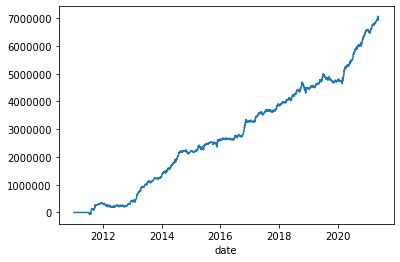

                 tscarry-ryieldnmb-commod_mkts-1-120-1-0.2
sharp_ratio_10y                                   2.549858
sharp_ratio_1y                                    4.739858
sharp_ratio_2y                                    3.226014
sharp_ratio_3y                                    2.805166
sharp_ratio_4y                                    2.613316
sharp_ratio_5y                                    2.768822
sharp_ratio_6y                                    2.519276
sharp_ratio_8y                                    2.622647
std_pnl_10y                                   17755.103895
std_pnl_1y                                    21723.703196
std_pnl_2y                                    22529.665983
std_pnl_3y                                    22317.691365
std_pnl_4y                                    20773.629969
std_pnl_5y                                    20196.728668
std_pnl_6y                                    19855.454855
std_pnl_8y                                    18692.8739

<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


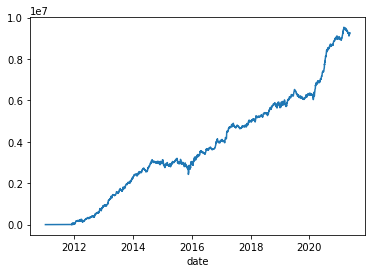

                 tscarry-basmomnma-commod_mkts-100-120-1-0.2
sharp_ratio_10y                                     2.022800
sharp_ratio_1y                                      3.883016
sharp_ratio_2y                                      2.792813
sharp_ratio_3y                                      2.380026
sharp_ratio_4y                                      2.163714
sharp_ratio_5y                                      2.329563
sharp_ratio_6y                                      1.986654
sharp_ratio_8y                                      1.975209
std_pnl_10y                                     29780.214314
std_pnl_1y                                      36719.246269
std_pnl_2y                                      35192.979627
std_pnl_3y                                      36141.176022
std_pnl_4y                                      33567.335687
std_pnl_5y                                      32102.613344
std_pnl_6y                                      34069.878583
std_pnl_8y              

<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


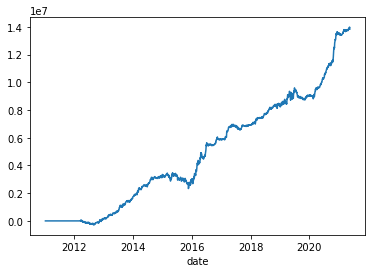

                 tscarry-basmomnma-commod_mkts-170-120-1-0.2
sharp_ratio_10y                                     2.071235
sharp_ratio_1y                                      5.116936
sharp_ratio_2y                                      3.082265
sharp_ratio_3y                                      2.638552
sharp_ratio_4y                                      2.356256
sharp_ratio_5y                                      2.572976
sharp_ratio_6y                                      2.225195
sharp_ratio_8y                                      2.260874
std_pnl_10y                                     43631.679412
std_pnl_1y                                      50643.744440
std_pnl_2y                                      50461.598895
std_pnl_3y                                      52612.898387
std_pnl_4y                                      48298.221539
std_pnl_5y                                      46934.676161
std_pnl_6y                                      51509.860494
std_pnl_8y              

<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


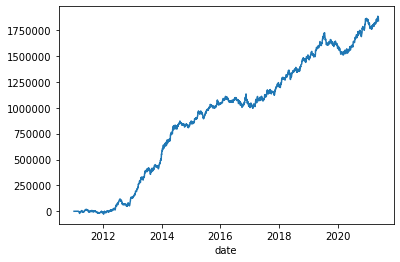

                 xscarry-ryieldsma-commod_mkts-1-30-10-0.2
sharp_ratio_10y                                   1.588781
sharp_ratio_1y                                    1.973145
sharp_ratio_2y                                    0.827308
sharp_ratio_3y                                    1.368200
sharp_ratio_4y                                    1.426793
sharp_ratio_5y                                    1.177156
sharp_ratio_6y                                    1.188531
sharp_ratio_8y                                    1.529440
std_pnl_10y                                    7522.620643
std_pnl_1y                                     9338.034774
std_pnl_2y                                     9156.777165
std_pnl_3y                                     8769.735429
std_pnl_4y                                     8522.619969
std_pnl_5y                                     8629.166830
std_pnl_6y                                     8238.389049
std_pnl_8y                                     8106.4113

<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


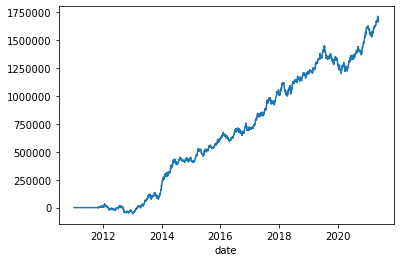

                 xscarry-ryieldsma-commod_mkts-1-190-10-0.2
sharp_ratio_10y                                    1.486432
sharp_ratio_1y                                     2.391247
sharp_ratio_2y                                     1.097303
sharp_ratio_3y                                     1.422430
sharp_ratio_4y                                     1.447544
sharp_ratio_5y                                     1.543265
sharp_ratio_6y                                     1.531427
sharp_ratio_8y                                     1.666737
std_pnl_10y                                     7314.984321
std_pnl_1y                                      9573.486705
std_pnl_2y                                      9793.944590
std_pnl_3y                                      9211.538044
std_pnl_4y                                      9188.088634
std_pnl_5y                                      8784.476560
std_pnl_6y                                      8392.610618
std_pnl_8y                              

<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


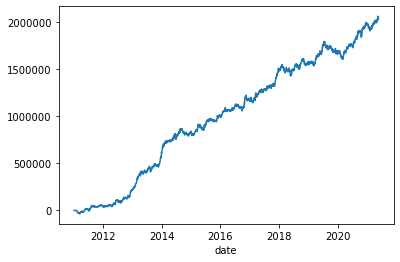

                 xscarry-ryieldnma-commod_mkts-1-20-1-0.2
sharp_ratio_10y                                  1.787433
sharp_ratio_1y                                   1.999224
sharp_ratio_2y                                   1.362214
sharp_ratio_3y                                   1.477650
sharp_ratio_4y                                   1.467420
sharp_ratio_5y                                   1.500153
sharp_ratio_6y                                   1.578686
sharp_ratio_8y                                   1.678458
std_pnl_10y                                   7360.094382
std_pnl_1y                                    8619.045146
std_pnl_2y                                    8923.774703
std_pnl_3y                                    8554.782969
std_pnl_4y                                    8347.429290
std_pnl_5y                                    8315.840391
std_pnl_6y                                    7991.580002
std_pnl_8y                                    7874.362631


<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


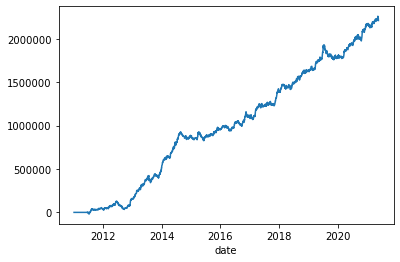

                 xscarry-ryieldnma-commod_mkts-1-110-1-0.2
sharp_ratio_10y                                   1.976085
sharp_ratio_1y                                    1.998864
sharp_ratio_2y                                    1.654432
sharp_ratio_3y                                    1.981249
sharp_ratio_4y                                    1.905972
sharp_ratio_5y                                    1.961102
sharp_ratio_6y                                    1.835344
sharp_ratio_8y                                    1.967885
std_pnl_10y                                    7313.058367
std_pnl_1y                                     9150.366752
std_pnl_2y                                     9044.820155
std_pnl_3y                                     8648.217344
std_pnl_4y                                     8415.324266
std_pnl_5y                                     8288.314214
std_pnl_6y                                     7994.763907
std_pnl_8y                                     7829.4670

<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


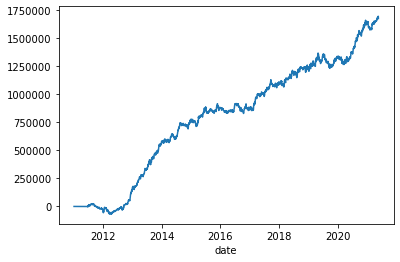

                 xscarry-basmomsma-commod_mkts-100-10-5-0.2
sharp_ratio_10y                                    1.551325
sharp_ratio_1y                                     2.762258
sharp_ratio_2y                                     1.450085
sharp_ratio_3y                                     1.253610
sharp_ratio_4y                                     1.298333
sharp_ratio_5y                                     1.303570
sharp_ratio_6y                                     1.195091
sharp_ratio_8y                                     1.500853
std_pnl_10y                                     7064.777445
std_pnl_1y                                      8472.615407
std_pnl_2y                                      8311.618527
std_pnl_3y                                      8786.988077
std_pnl_4y                                      8457.573869
std_pnl_5y                                      8244.981590
std_pnl_6y                                      7906.760271
std_pnl_8y                              

<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


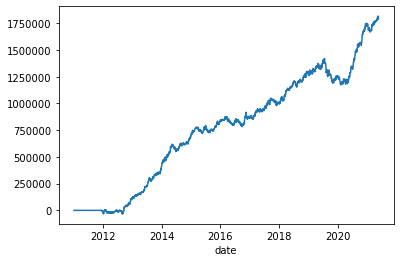

                 xscarry-basmomsma-commod_mkts-220-10-5-0.2
sharp_ratio_10y                                    1.694413
sharp_ratio_1y                                     3.909382
sharp_ratio_2y                                     1.555688
sharp_ratio_3y                                     1.541401
sharp_ratio_4y                                     1.623496
sharp_ratio_5y                                     1.541942
sharp_ratio_6y                                     1.469230
sharp_ratio_8y                                     1.758704
std_pnl_10y                                     6892.541749
std_pnl_1y                                      8854.808081
std_pnl_2y                                      9375.597527
std_pnl_3y                                      8988.393635
std_pnl_4y                                      8583.177433
std_pnl_5y                                      8239.536770
std_pnl_6y                                      7894.485759
std_pnl_8y                              

<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


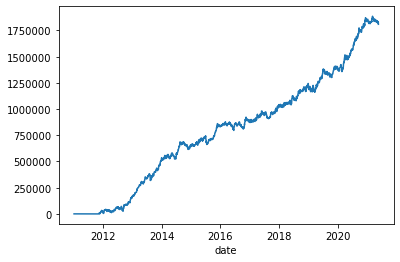

                 xscarry-basmomnma-commod_mkts-80-120-5-0.2
sharp_ratio_10y                                    1.791599
sharp_ratio_1y                                     2.453061
sharp_ratio_2y                                     2.234788
sharp_ratio_3y                                     1.962567
sharp_ratio_4y                                     1.772516
sharp_ratio_5y                                     1.643471
sharp_ratio_6y                                     1.616043
sharp_ratio_8y                                     1.739973
std_pnl_10y                                     6595.849269
std_pnl_1y                                      8138.416945
std_pnl_2y                                      7910.303813
std_pnl_3y                                      8222.114263
std_pnl_4y                                      7863.813315
std_pnl_5y                                      7666.709666
std_pnl_6y                                      7431.457651
std_pnl_8y                              

<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


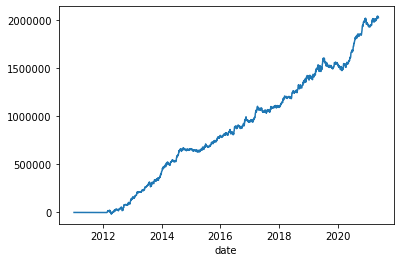

                 xscarry-basmomnma-commod_mkts-150-120-5-0.2
sharp_ratio_10y                                     2.045879
sharp_ratio_1y                                      3.477451
sharp_ratio_2y                                      2.068992
sharp_ratio_3y                                      2.103560
sharp_ratio_4y                                      1.920891
sharp_ratio_5y                                      1.993419
sharp_ratio_6y                                      1.987681
sharp_ratio_8y                                      2.082742
std_pnl_10y                                      6460.232032
std_pnl_1y                                       8328.256368
std_pnl_2y                                       8475.763177
std_pnl_3y                                       8652.812505
std_pnl_4y                                       8039.706297
std_pnl_5y                                       7802.202102
std_pnl_6y                                       7510.560187
std_pnl_8y              

<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


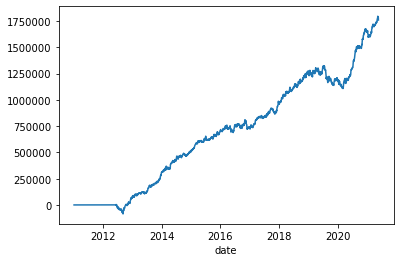

                 xscarry-basmomnma-commod_mkts-220-120-5-0.2
sharp_ratio_10y                                     1.795227
sharp_ratio_1y                                      4.385006
sharp_ratio_2y                                      1.979146
sharp_ratio_3y                                      1.692694
sharp_ratio_4y                                      1.856704
sharp_ratio_5y                                      1.766546
sharp_ratio_6y                                      1.673151
sharp_ratio_8y                                      1.920965
std_pnl_10y                                      6405.409300
std_pnl_1y                                       8064.016421
std_pnl_2y                                       8431.224600
std_pnl_3y                                       8490.433681
std_pnl_4y                                       8108.926825
std_pnl_5y                                       7778.717695
std_pnl_6y                                       7529.057175
std_pnl_8y              

<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


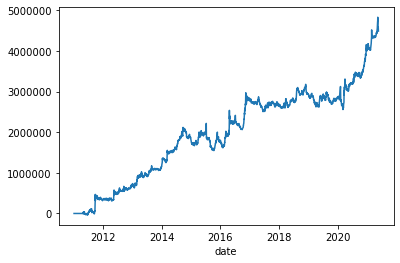

                 tsmom-momnma-commod_mkts-10-60-1-0.2
sharp_ratio_10y                              0.952866
sharp_ratio_1y                               2.253009
sharp_ratio_2y                               1.407576
sharp_ratio_3y                               1.085162
sharp_ratio_4y                               0.916514
sharp_ratio_5y                               0.895467
sharp_ratio_6y                               0.798041
sharp_ratio_8y                               0.913696
std_pnl_10y                              30816.556882
std_pnl_1y                               38422.532715
std_pnl_2y                               39882.944716
std_pnl_3y                               34976.331986
std_pnl_4y                               32521.863029
std_pnl_5y                               32237.784925
std_pnl_6y                               34364.584052
std_pnl_8y                               31899.366119


<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


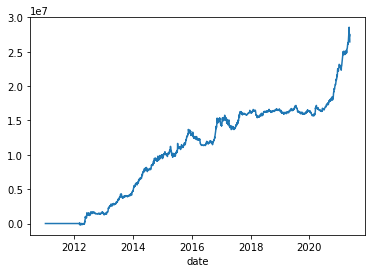

                 tsmom-momnma-commod_mkts-220-60-1-0.2
sharp_ratio_10y                               1.620337
sharp_ratio_1y                                3.594477
sharp_ratio_2y                                2.305217
sharp_ratio_3y                                1.934467
sharp_ratio_4y                                1.791096
sharp_ratio_5y                                1.645150
sharp_ratio_6y                                1.486170
sharp_ratio_8y                                1.664741
std_pnl_10y                              106594.871058
std_pnl_1y                               181312.329426
std_pnl_2y                               140167.443816
std_pnl_3y                               118723.143980
std_pnl_4y                               112464.662422
std_pnl_5y                               119407.420620
std_pnl_6y                               119963.957844
std_pnl_8y                               115598.718060


<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


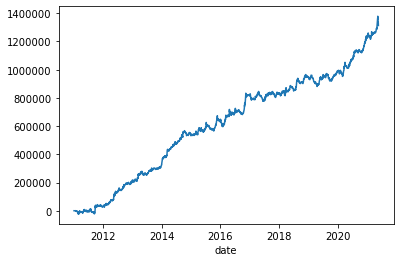

                 tsmom-hlbrk-commod_mkts-10-1-10-0.2
sharp_ratio_10y                             1.744440
sharp_ratio_1y                              2.737729
sharp_ratio_2y                              2.187759
sharp_ratio_3y                              1.747049
sharp_ratio_4y                              1.531640
sharp_ratio_5y                              1.523690
sharp_ratio_6y                              1.517417
sharp_ratio_8y                              1.693815
std_pnl_10y                              4918.450075
std_pnl_1y                               6630.613641
std_pnl_2y                               5807.339132
std_pnl_3y                               5323.036250
std_pnl_4y                               5335.985362
std_pnl_5y                               5331.245251
std_pnl_6y                               5331.414712
std_pnl_8y                               5067.489312


<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


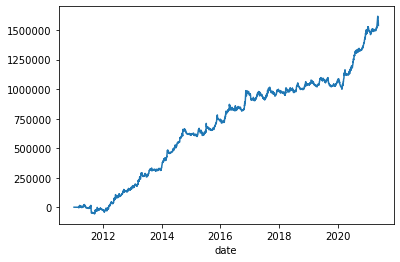

                 tsmom-hlbrk-commod_mkts-30-1-10-0.2
sharp_ratio_10y                             1.591306
sharp_ratio_1y                              3.103112
sharp_ratio_2y                              2.096490
sharp_ratio_3y                              1.745667
sharp_ratio_4y                              1.444634
sharp_ratio_5y                              1.346242
sharp_ratio_6y                              1.470950
sharp_ratio_8y                              1.615979
std_pnl_10y                              6276.218838
std_pnl_1y                               8303.161183
std_pnl_2y                               7376.327017
std_pnl_3y                               6641.706275
std_pnl_4y                               6694.042842
std_pnl_5y                               6815.713123
std_pnl_6y                               6787.141642
std_pnl_8y                               6439.074572


<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


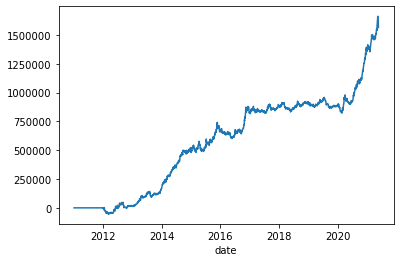

                 tsmom-hlbrk-commod_mkts-240-1-10-0.2
sharp_ratio_10y                              1.555480
sharp_ratio_1y                               3.904965
sharp_ratio_2y                               2.325599
sharp_ratio_3y                               2.003044
sharp_ratio_4y                               1.626321
sharp_ratio_5y                               1.698374
sharp_ratio_6y                               1.559588
sharp_ratio_8y                               1.692327
std_pnl_10y                               6574.216050
std_pnl_1y                               10945.471462
std_pnl_2y                                9069.967287
std_pnl_3y                                7839.721763
std_pnl_4y                                7259.660498
std_pnl_5y                                7343.925633
std_pnl_6y                                7394.903321
std_pnl_8y                                7102.283533


<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


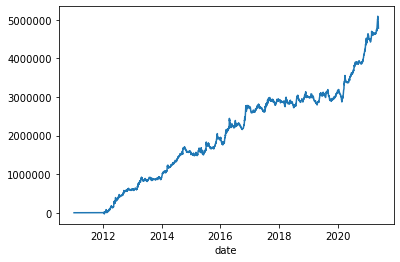

                 tsmom-macdnma-commod_mkts-8-160-5-0.2
sharp_ratio_10y                               1.473748
sharp_ratio_1y                                2.842264
sharp_ratio_2y                                2.161993
sharp_ratio_3y                                1.661937
sharp_ratio_4y                                1.385518
sharp_ratio_5y                                1.352266
sharp_ratio_6y                                1.436607
sharp_ratio_8y                                1.426628
std_pnl_10y                               21198.496748
std_pnl_1y                                30345.297625
std_pnl_2y                                27140.673284
std_pnl_3y                                24561.467080
std_pnl_4y                                24373.407143
std_pnl_5y                                24236.241864
std_pnl_6y                                24359.660901
std_pnl_8y                                22557.262791


<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


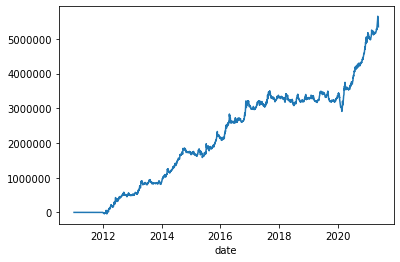

                 tsmom-macdnma-commod_mkts-16-160-5-0.2
sharp_ratio_10y                                1.415834
sharp_ratio_1y                                 3.376469
sharp_ratio_2y                                 1.973227
sharp_ratio_3y                                 1.570693
sharp_ratio_4y                                 1.261842
sharp_ratio_5y                                 1.247554
sharp_ratio_6y                                 1.412912
sharp_ratio_8y                                 1.405551
std_pnl_10y                                24665.485765
std_pnl_1y                                 34094.714248
std_pnl_2y                                 32901.513940
std_pnl_3y                                 29189.768823
std_pnl_4y                                 28724.899825
std_pnl_5y                                 28462.684132
std_pnl_6y                                 28529.900589
std_pnl_8y                                 26272.295581


<ipython-input-5-351614432aab>:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


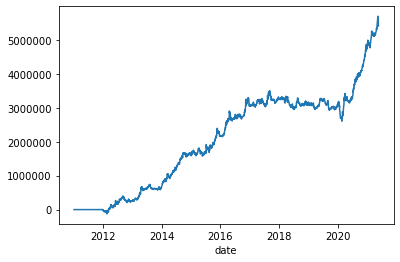

                 tsmom-macdnma-commod_mkts-24-160-5-0.2
sharp_ratio_10y                                1.339733
sharp_ratio_1y                                 3.895897
sharp_ratio_2y                                 2.025615
sharp_ratio_3y                                 1.598818
sharp_ratio_4y                                 1.181735
sharp_ratio_5y                                 1.164958
sharp_ratio_6y                                 1.340587
sharp_ratio_8y                                 1.393559
std_pnl_10y                                26357.720466
std_pnl_1y                                 37272.063936
std_pnl_2y                                 36244.657227
std_pnl_3y                                 31870.186014
std_pnl_4y                                 31126.932070
std_pnl_5y                                 30610.062158
std_pnl_6y                                 30654.000128
std_pnl_8y                                 28219.421160


<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


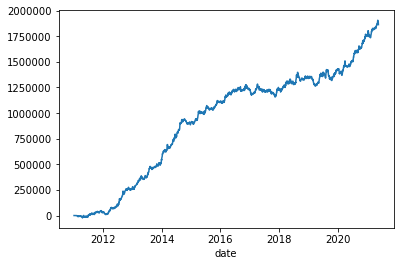

                 xsmom-hlbrk-commod_mkts-20-1-10-0.2
sharp_ratio_10y                             1.955506
sharp_ratio_1y                              3.439056
sharp_ratio_2y                              2.241464
sharp_ratio_3y                              1.623057
sharp_ratio_4y                              1.466588
sharp_ratio_5y                              1.223777
sharp_ratio_6y                              1.388731
sharp_ratio_8y                              1.854792
std_pnl_10y                              6270.142079
std_pnl_1y                               7333.797863
std_pnl_2y                               7565.998286
std_pnl_3y                               7169.395216
std_pnl_4y                               7071.272836
std_pnl_5y                               6990.157923
std_pnl_6y                               6749.538332
std_pnl_8y                               6622.211383


<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


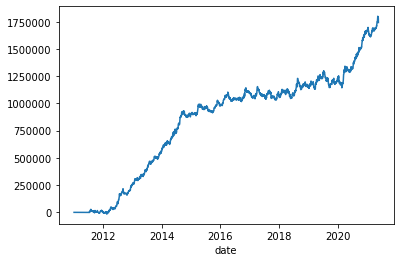

                 xsmom-hlbrk-commod_mkts-120-1-10-0.2
sharp_ratio_10y                              1.555918
sharp_ratio_1y                               3.170523
sharp_ratio_2y                               1.862751
sharp_ratio_3y                               1.676768
sharp_ratio_4y                               1.240198
sharp_ratio_5y                               1.097851
sharp_ratio_6y                               1.057928
sharp_ratio_8y                               1.462172
std_pnl_10y                               7315.454167
std_pnl_1y                                9037.020536
std_pnl_2y                                9022.237193
std_pnl_3y                                8835.463818
std_pnl_4y                                8633.926688
std_pnl_5y                                8430.471516
std_pnl_6y                                8057.849202
std_pnl_8y                                7811.610856


<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


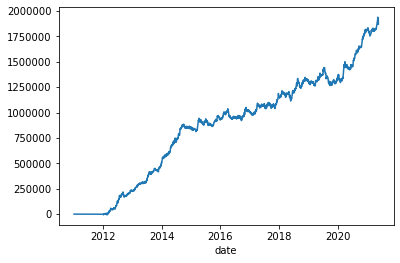

                 xsmom-hlbrk-commod_mkts-240-1-10-0.2
sharp_ratio_10y                              1.697334
sharp_ratio_1y                               3.069807
sharp_ratio_2y                               1.847641
sharp_ratio_3y                               1.772474
sharp_ratio_4y                               1.496428
sharp_ratio_5y                               1.433518
sharp_ratio_6y                               1.291067
sharp_ratio_8y                               1.631496
std_pnl_10y                               7195.498603
std_pnl_1y                                9169.707410
std_pnl_2y                                9272.072066
std_pnl_3y                                8890.879113
std_pnl_4y                                8705.737107
std_pnl_5y                                8440.337412
std_pnl_6y                                8141.135638
std_pnl_8y                                7804.910149


<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


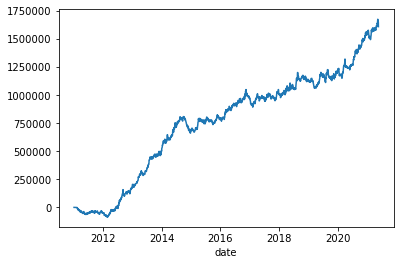

                 xsmom-mom-commod_mkts-20-1-5-0.2
sharp_ratio_10y                          1.430814
sharp_ratio_1y                           2.499608
sharp_ratio_2y                           1.642042
sharp_ratio_3y                           1.276987
sharp_ratio_4y                           1.181172
sharp_ratio_5y                           1.070870
sharp_ratio_6y                           1.100078
sharp_ratio_8y                           1.320880
std_pnl_10y                           7603.681181
std_pnl_1y                            9403.475921
std_pnl_2y                            9345.706429
std_pnl_3y                            8777.604013
std_pnl_4y                            8672.720738
std_pnl_5y                            8687.342092
std_pnl_6y                            8355.634122
std_pnl_8y                            8086.654548


<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


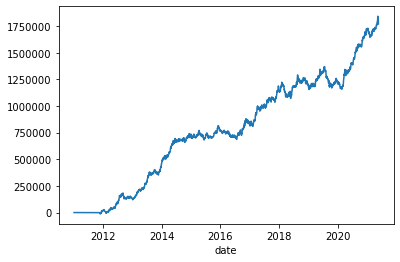

                 xsmom-mom-commod_mkts-210-1-5-0.2
sharp_ratio_10y                           1.494503
sharp_ratio_1y                            2.825001
sharp_ratio_2y                            1.599006
sharp_ratio_3y                            1.522202
sharp_ratio_4y                            1.352879
sharp_ratio_5y                            1.478837
sharp_ratio_6y                            1.270792
sharp_ratio_8y                            1.499035
std_pnl_10y                            7734.020362
std_pnl_1y                             9955.296136
std_pnl_2y                             9729.145894
std_pnl_3y                             9431.102791
std_pnl_4y                             9350.018113
std_pnl_5y                             9291.869504
std_pnl_6y                             8851.745120
std_pnl_8y                             8408.617592


<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


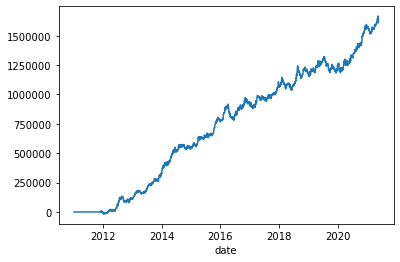

                 xsmom-momnma-commod_mkts-130-90-5-0.2
sharp_ratio_10y                               1.451141
sharp_ratio_1y                                2.303110
sharp_ratio_2y                                1.279096
sharp_ratio_3y                                1.334935
sharp_ratio_4y                                1.206125
sharp_ratio_5y                                1.229953
sharp_ratio_6y                                1.278742
sharp_ratio_8y                                1.494612
std_pnl_10y                                7253.491383
std_pnl_1y                                 9516.945775
std_pnl_2y                                 9176.852667
std_pnl_3y                                 8946.092226
std_pnl_4y                                 8707.849374
std_pnl_5y                                 8584.554772
std_pnl_6y                                 8305.202147
std_pnl_8y                                 7892.222709


<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


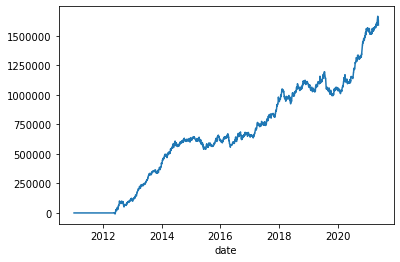

                 xsmom-momnma-commod_mkts-240-90-5-0.2
sharp_ratio_10y                               1.493428
sharp_ratio_1y                                3.289173
sharp_ratio_2y                                1.685883
sharp_ratio_3y                                1.581743
sharp_ratio_4y                                1.567199
sharp_ratio_5y                                1.576761
sharp_ratio_6y                                1.329466
sharp_ratio_8y                                1.446259
std_pnl_10y                                6958.416438
std_pnl_1y                                 9559.337456
std_pnl_2y                                 9442.911265
std_pnl_3y                                 8924.828450
std_pnl_4y                                 8751.559171
std_pnl_5y                                 8409.668644
std_pnl_6y                                 8124.692485
std_pnl_8y                                 7595.877955


<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


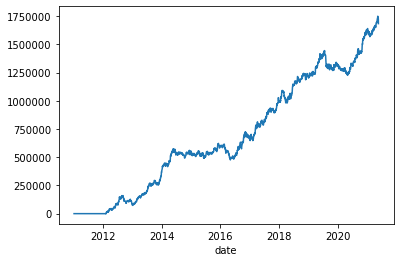

                 xsmom-momsma-commod_mkts-140-120-5-0.2
sharp_ratio_10y                                1.468497
sharp_ratio_1y                                 2.881359
sharp_ratio_2y                                 1.041847
sharp_ratio_3y                                 1.520099
sharp_ratio_4y                                 1.567443
sharp_ratio_5y                                 1.719808
sharp_ratio_6y                                 1.434696
sharp_ratio_8y                                 1.507222
std_pnl_10y                                 7493.618915
std_pnl_1y                                  9706.485804
std_pnl_2y                                  9650.076547
std_pnl_3y                                  9170.076099
std_pnl_4y                                  9020.805502
std_pnl_5y                                  9037.126124
std_pnl_6y                                  8672.404413
std_pnl_8y                                  8187.024921


<ipython-input-6-ba62413134b1>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['date'] = adf['date']


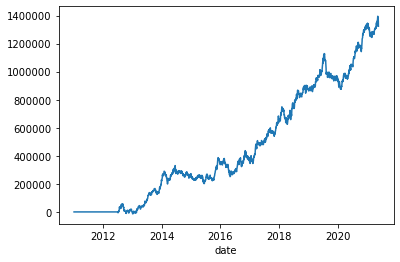

                 xsmom-momsma-commod_mkts-240-120-5-0.2
sharp_ratio_10y                                1.159783
sharp_ratio_1y                                 2.118911
sharp_ratio_2y                                 1.144218
sharp_ratio_3y                                 1.405155
sharp_ratio_4y                                 1.439038
sharp_ratio_5y                                 1.486656
sharp_ratio_6y                                 1.304438
sharp_ratio_8y                                 1.274384
std_pnl_10y                                 7454.473053
std_pnl_1y                                  9686.033577
std_pnl_2y                                  9925.137684
std_pnl_3y                                  9695.664087
std_pnl_4y                                  9406.777680
std_pnl_5y                                  9225.783087
std_pnl_6y                                  8863.565756
std_pnl_8y                                  8195.127246


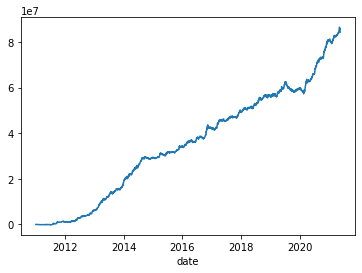

date
2021-04-06    8.319393e+07
2021-04-07    8.301544e+07
2021-04-08    8.293516e+07
2021-04-09    8.300411e+07
2021-04-12    8.297752e+07
2021-04-13    8.314270e+07
2021-04-14    8.314590e+07
2021-04-15    8.308577e+07
2021-04-16    8.311178e+07
2021-04-19    8.321196e+07
2021-04-20    8.335104e+07
2021-04-21    8.353000e+07
2021-04-22    8.371672e+07
2021-04-23    8.383702e+07
2021-04-26    8.389973e+07
2021-04-27    8.405259e+07
2021-04-28    8.390798e+07
2021-04-29    8.405529e+07
2021-04-30    8.395122e+07
2021-05-06    8.513641e+07
2021-05-07    8.532957e+07
2021-05-10    8.563119e+07
2021-05-11    8.608704e+07
2021-05-12    8.648517e+07
2021-05-13    8.618660e+07
2021-05-14    8.578494e+07
2021-05-17    8.565841e+07
2021-05-18    8.581055e+07
2021-05-19    8.543585e+07
2021-05-20    8.430480e+07
Name: daily_pnl, dtype: float64
                             0
sharp_ratio_10y       2.821843
sharp_ratio_1y        4.644274
sharp_ratio_2y        3.000326
sharp_ratio_3y        2.77098

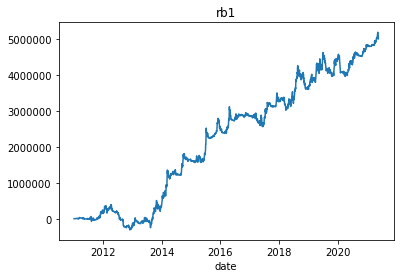

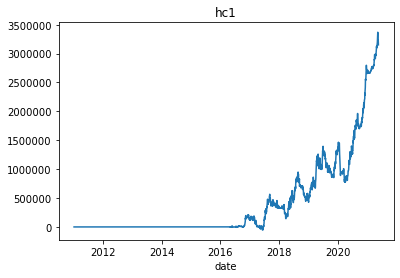

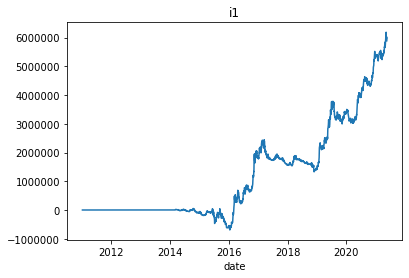

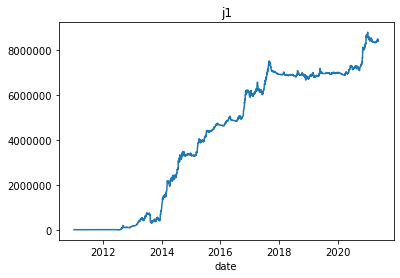

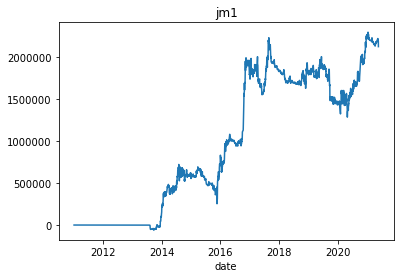

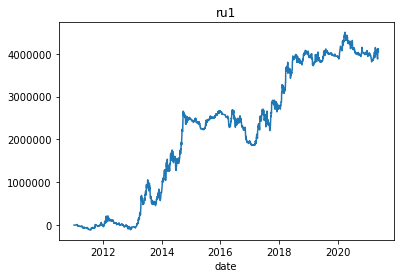

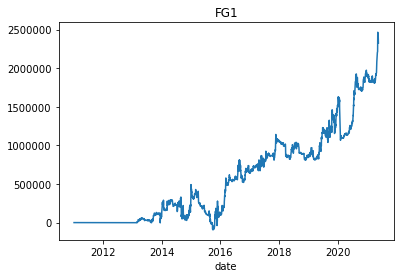

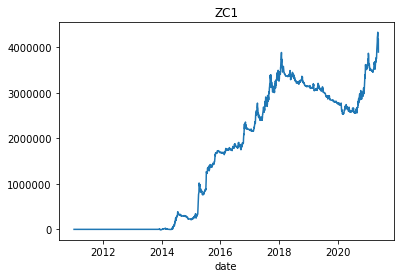

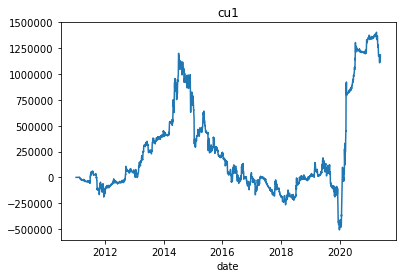

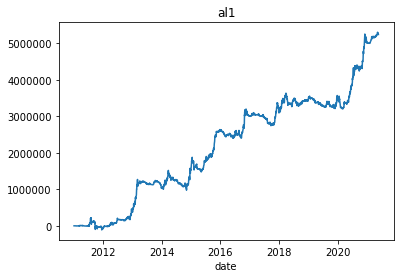

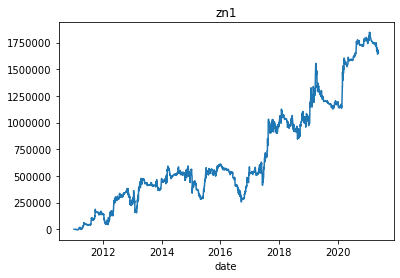

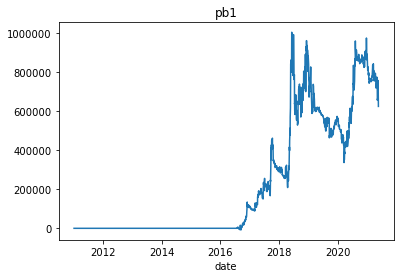

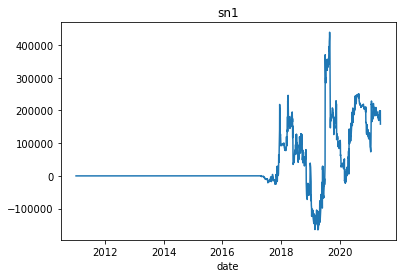

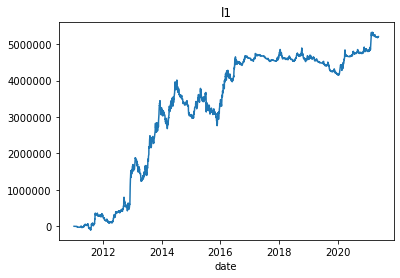

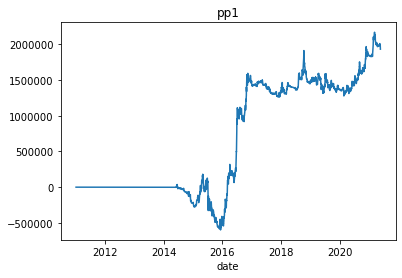

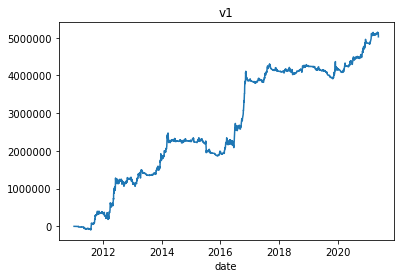

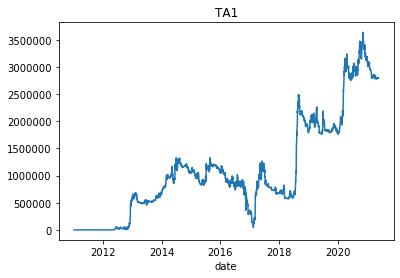

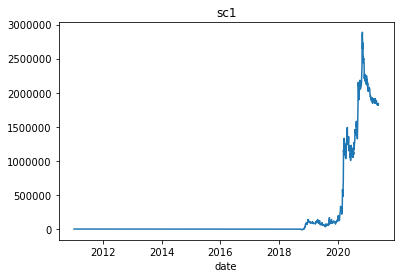

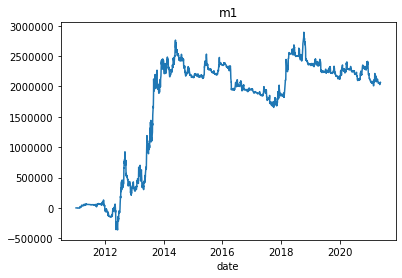

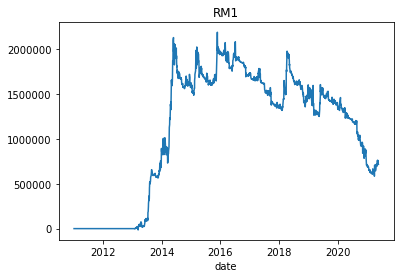

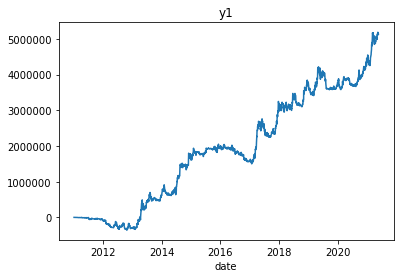

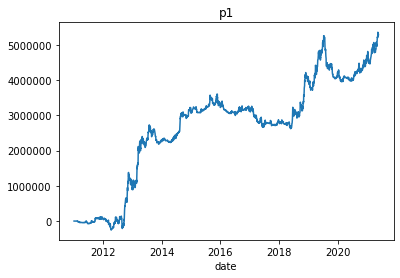

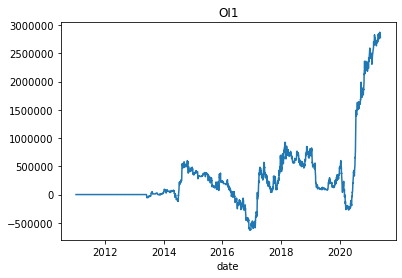

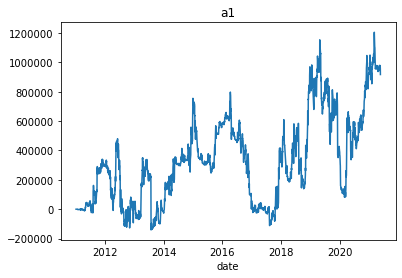

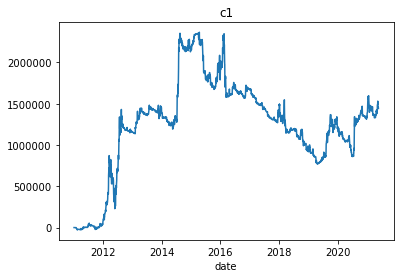

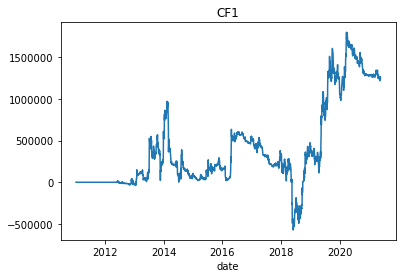

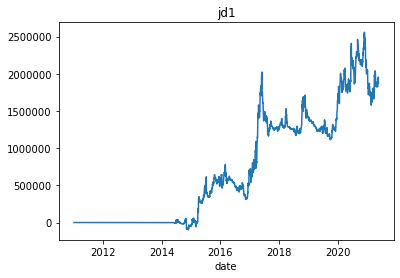

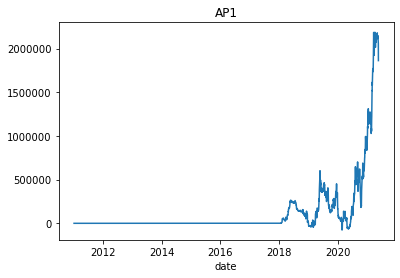

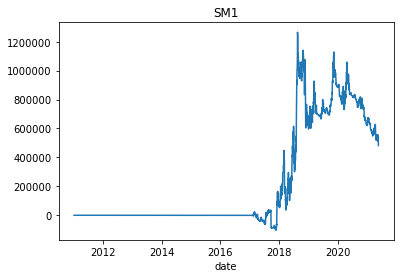

In [20]:
res = {}
stats_list = []
cum_list = []
sratio_years = [int(ten[:-1]) for ten in pnl_tenors]
reverse_list = ['lrkurt']

metal_mixed_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'ni']
petro_mixed_mkts = ['l', 'pp', 'v', 'TA', 'MA', 'bu', 'sc']
ags_mixed_mkts = ['m', 'RM', 'y', 'p', 'OI', 'a', 'c', 'cs', 'CF', 'SR', 'jd']
commod_mkts = ['rb', 'hc', 'i', 'j', 'jm', 'ru', 'FG', 'ZC', 'cu', 'al', 'zn', 'pb', 'sn', \
               'l', 'pp', 'v', 'TA', 'sc', 'm', 'RM', 'y', 'p', 'OI', 'a', 'c', 'CF', 'jd', \
               'AP', 'SM'] #, 'SF', 'ni', 'cs', 'MA', 'bu', 'SR', 'fu']
# 'SM', "SF", 'au', 'ag', 'fu', 'b']

product_list = commod_mkts # metal_mixed_mkts # +  petro_mixed_mkts #  
# # ind_metal_mkts #commod_all_mkts #  ferrous_products_mkts #+ ferrous_mixed_mkts + base_metal_mkts
product_name = 'commod_mkts'

sim_name = 'tscarry'
run_mode = 'nryield'

start_date = datetime.date(2011,1,1)
end_date = datetime.date(2021,5,20)
quantile = 0.2
cost_ratio = 0.5
total_risk = 3000.0
pos_std = 1
std_win = 20
win = 60
ma_win = 120
rebal = 5
params = [0.0, 0.0]
pos_map = (None, {}, '')
exec_field = 'open'
#save_loc = "C:\\dev\\data\\selected_%s_" % ('_'.join([sim_name, run_mode, product_name, str(quant), str(end_date)]))
save_loc = "C:\\dev\\data\\combined_carry_" + product_name + "_" + str(end_date) + '_'

run_pos_sum = True
pos_sum = pd.DataFrame()
dpnl_sum = pd.DataFrame()
pos_list = []

#ind_metal_mkts
# scenarios = [('tscarry', 'ryield', 0.33, 1, 1, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 60, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 100, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tscarry', 'basmom', 0.11, 240, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('xscarry', 'ryieldsma', 0.0, 1, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'ryieldsma', 0.0, 1, 50, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmom', 0.0, 110, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmom', 0.0, 140, 1, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmomsma', 0.0, 90, 20, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('xscarry', 'basmomsma', 0.0, 230, 20, 5, (None, {}, ''), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 20, 50, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 30, 120, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'momxma', 0.03, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'mixmom', 0.03, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'mixmom', 0.03, 20, 1, 10, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 20, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'rsixea', 0.03, 60, 30, 5, (misc.sign, {}, 'sign'), [0.0, 0.0]), \
#              ('tsmom', 'macdnma', 0.03, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
#              ('tsmom', 'macdnma', 0.03, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
#              ('tsmom', 'macdnma', 0.03, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
#              #('xsmom', 'mom', 0.0, 130, 1, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'mom', 0.0, 230, 1, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 60, 80, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 10, 80, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'rsiema', 0.0, 40, 20, 5, (None, {}, ''), [0.0]), \
#              #('xsmom', 'macdnma', 0.0, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
#              #('xsmom', 'macdnma', 0.0, 40, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
#              #('xsmom', 'macdnma', 0.0, 56, 280, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 2.5], 0.2), \
#             ] 

#commod_mkts
scenarios = [ \
             ('tscarry', 'ryieldnmb', 2.8, 1, 120, 1, (None, {}, ''), [0.0, 0.0]), \
             ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]), \
             ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),\
             #('tscarry', 'basmomnma', 0.2, 230, 120, 1, (None, {}, ''), [0.0, 0.0]),\
             ('xscarry', 'ryieldsma', 0.6, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xscarry', 'ryieldsma', 0.15, 1, 110, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldsma', 1.5, 1, 190, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldnma',1.5, 1, 20, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'ryieldnma', 1.8, 1, 110, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('xscarry', 'ryieldnma', 0.2, 1, 210, 1, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomsma', 0.6, 100, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomsma', 0.6, 220, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 80, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 150, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xscarry', 'basmomnma', 1.5, 220, 120, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'momnma', 0.2, 10, 60, 1, (None, {}, ''), [0.0]), \
             ('tsmom', 'momnma', 0.07, 220, 60, 1, (None, {}, ''), [0.0]), \
             ('tsmom', 'hlbrk', 2.0, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'hlbrk', 1.5, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('tsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             #('tsmom', 'momxma', 0.2, 40, 30, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'momxma', 0.15, 40, 80, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.375, 10, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.3, 30, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'mixmom', 0.3, 220, 1, 10, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'rsixea', 0.25, 30, 40, 5, (misc.sign, {}, 'sign'), [0.0]), \
             #('tsmom', 'rsixea', 0.25, 30, 110, 5, (misc.sign, {}, 'sign'), [0.0]), \
             ('tsmom', 'macdnma', 0.4, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
             ('tsmom', 'macdnma', 0.3, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
             ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
             #('xsmom', 'mom', 0.15, 160, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.5, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.2, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
             ('xsmom', 'mom', 1.0, 20, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'mom', 1.0, 210, 1, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momnma', 1.0, 130, 90, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momnma', 1.0, 240, 90, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2), \
             ('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 70, 60, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 100, 80, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'rsiema', 0.1, 90, 10, 5, (None, {}, ''), [0.0], 0.2), \
             #('xsmom', 'macdnma', 0.1, 8, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 12.5], 0.2), \
             #('xsmom', 'macdnma', 0.1, 16, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 6.25], 0.2), \
             #('xsmom', 'macdnma', 0.1, 32, 200, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 3.125], 0.2), \
             #('xsmom', 'macdnma', 0.1, 64, 100, 5, (dh.response_curve, {"response": "absorbing", "param": 2}, "absorbing"), [1.5, 1.56], 0.2), \
            ]

# scenarios = [ \
# #              ('tscarry', 'basmomnma', 0.35, 10, 120, 1, (None, {}, ''), [0.0, 0.0]), \
# #              ('tscarry', 'basmomnma', 0.3, 20, 120, 1, (None, {}, ''), [0.0, 0.0]), \
# #              ('tscarry', 'basmomnma', 0.28, 40, 120, 1, (None, {}, ''), [0.0, 0.0]), \
# #              ('tscarry', 'basmomnma', 0.25, 60, 120, 1, (None, {}, ''), [0.0, 0.0]),\
# #              ('tscarry', 'basmomnma', 0.18, 120, 120, 1, (None, {}, ''), [0.0, 0.0]),\
# #              ('tscarry', 'basmomnma', 0.15, 180, 120, 1, (None, {}, ''), [0.0, 0.0]),\
#              ('tscarry', 'basmomnma', 0.7, 100, 120, 1, (None, {}, ''), [0.0, 0.0]), \
#              ('tscarry', 'basmomnma', 0.5, 170, 120, 1, (None, {}, ''), [0.0, 0.0]),\
# #              ('tsmom', 'hlbrk', 2.0, 10, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('tsmom', 'hlbrk', 1.5, 30, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('tsmom', 'hlbrk', 1.2, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsmom', 'hlbrk', 1.2, 20, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsmom', 'hlbrk', 1.1, 120, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsmom', 'hlbrk', 1.1, 240, 1, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('tsmom', 'momnma', 0.25, 10, 60, 1, (None, {}, ''), [0.0]), \
# #              ('tsmom', 'momnma', 0.10, 220, 60, 1, (None, {}, ''), [0.0]), \
# #              ('tsmom', 'macdnma', 0.4, 8, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 10.0]), \
# #              ('tsmom', 'macdnma', 0.3, 16, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 5.0]), \
# #              ('tsmom', 'macdnma', 0.3, 24, 160, 5, (dh.response_curve, {"response": "reverting", "param": 2}, 'reverting'), [1.5, 3.34]), \
# #              ('xsmom', 'mom', 0.8, 20, 1, 5, (None, {}, ''), [0.0], 0.2), \
# #              ('xsmom', 'mom', 0.8, 210, 1, 5, (None, {}, ''), [0.0], 0.2), \
# #              ('xsmom', 'momnma', 0.8, 130, 90, 5, (None, {}, ''), [0.0], 0.2), \
# #              ('xsmom', 'momnma', 0.8, 240, 90, 5, (None, {}, ''), [0.0], 0.2), \
# #              ('xsmom', 'momsma', 0.8, 140, 120, 5, (None, {}, ''), [0.0], 0.2), \
# #              ('xsmom', 'momsma', 0.8, 240, 120, 5, (None, {}, ''), [0.0], 0.2), \
# #              #('xsfact', 'trdstrsma', 1.0, 1, 10, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              #('xsfact', 'trdstrsma', 1.0, 1, 15, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'trdstrsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'trdstrsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'upstdsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'upstdsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'upstdsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              #('xsfact', 'lrkurtsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              #('xsfact', 'lrkurtsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#              #('xsfact', 'lrkurtsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \

# #              ('xsfact', 'lrskewsma', 1.0, 1, 5, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'lrskewsma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'lrskewsma', 1.0, 1, 15, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'lrskewsma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'volmfratiosma', 1.0, 1, 10, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'volmfratiosma', 1.0, 1, 20, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'volmfratiosma', 1.0, 1, 30, 10, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'volmfratiosma', 1.0, 1, 10, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'volmfratiosma', 1.0, 1, 20, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
# #              ('xsfact', 'volmfratiosma', 1.0, 1, 30, 5, (None, {}, ''), [0.0, 0.0], 0.2), \
#             ]

if 'ts' in sim_name:
    sim_func = run_ts_test
elif 'xs' in sim_name:
    sim_func = run_xs_test

port_pnl = pd.Series()
dpnl_by_scen = [] 

for scen in scenarios:
    if len(scen) == 2:
        scen_x = scen[0]
        scen_y = scen[1]
        if run_mode in ['ryield']:
            win = 1
            ma_win = 1
            rebal = scen_y 
            if sim_name == 'xscarry':
                quantile = scen_x * 0.1
        elif run_mode in ['basmom']:
            win = scen_x
            ma_win = 1
            rebal = scen_y
        elif run_mode in ['basmomma']:
            win = scen_x
            ma_win = scen_y
            rebal = 5
        elif run_mode in ['nyield']:
            win = scen_x
            
        elif run_mode == 'ryieldma':
            rebal = scen_y
            ma_win = scen_x
        else:
            print("unsupported run_mode")
            continue
    elif len(scen) >= 8:
        sim_name = scen[0]
        if 'ts' in sim_name:
            sim_func = run_ts_test
        elif 'xs' in sim_name:
            sim_func = run_xs_test
            if len(scen) == 9:
                quantile = scen[8]
        run_mode = scen[1]
        weight = scen[2]
        win = scen[3]
        ma_win = scen[4]
        rebal = scen[5]
        pos_map = scen[6]
        params = scen[7]        
    else:
        print("unsupported scenarios")
        continue
    run_args = {}        
    run_args['run_name'] = run_name = '-'.join([sim_name, run_mode, product_name, str(win), str(ma_win), str(rebal), str(quantile)])
    run_args['cost_ratio'] = cost_ratio
    run_args['total_risk'] = total_risk
    run_args['exec_field'] = exec_field
    run_args['product_list'] = product_list
    run_args['start_date'] = start_date
    run_args['end_date'] = end_date
    
    run_args['win'] = win
    run_args['ma_win'] = ma_win
    run_args['std_win'] = std_win
    run_args['prefix'] = save_loc        
    run_args['rebal_freq'] = rebal
    run_args['pos_std'] = pos_std
    run_args['params'] = params
    run_args['pos_map'] = pos_map
    run_args['run_mode'] = run_mode
    run_args['quantile'] = quantile
    res = sim_func(run_args)
    res['cum_pnl'].plot()
    plt.show()
    cum_list.append(res['cum_pnl'])
    stats_list.append(res['pnl_stats'])
    vdf = res['pnl_stats']
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
    if run_pos_sum:
        pos_list.append(res['pos_df'])
        dpnl_by_scen.append(res['cum_pnl'].diff().dropna())
        pos_sum = pos_sum.add(res['pos_df'] * weight, fill_value = 0) 
        dpnl_sum = dpnl_sum.add(res['dpnl'] * weight, fill_value = 0) 
        port_pnl = port_pnl.add(res['cum_pnl'] * weight, fill_value = 0)

port_pnl.plot()
port_pnl.name = 'daily_pnl'
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(port_pnl.diff().dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
print(port_pnl[-30:])
print(vdf)
port_pnl.to_csv(file_folder + "port_pnl.csv")
cpnl = dpnl_sum.cumsum()
for col in cpnl.columns:
    cpnl[col].plot(title = col)
    plt.show()


          rb-pos      hc-pos        i-pos       j-pos      jm-pos      ru-pos  \
0       0.000000    0.000000     0.000000    0.000000    0.000000    0.000000   
1       0.000000    0.000000     0.000000    0.000000    0.000000    0.000000   
2       0.000000    0.000000     0.000000    0.000000    0.000000    0.000000   
3       0.000000    0.000000     0.000000    0.000000    0.000000    0.000000   
4       0.000000    0.000000     0.000000    0.000000    0.000000    0.000000   
...          ...         ...          ...         ...         ...         ...   
2515  184.538965  204.324923  1422.430003  168.477382  137.194960 -167.874449   
2516  153.349545  167.281633  1357.608278  134.753317  124.545757 -157.859722   
2517  199.742779  187.031213  1388.330926  130.185638  205.881935 -172.083730   
2518  190.417520  177.802666  1394.775227  123.136847  221.293825 -190.278672   
2519  129.387041  127.794102  1421.230580  105.929420  254.444334 -207.180596   

          FG-pos       ZC-p

<ipython-input-21-0a172ac03eb7>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pnl_dict[scen[0]][scen[1]] = pd.Series()


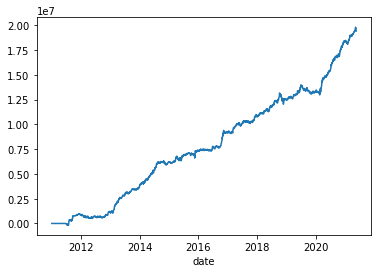

                            0
sharp_ratio_10y      2.549858
sharp_ratio_1y       4.739858
sharp_ratio_2y       3.226014
sharp_ratio_3y       2.805166
sharp_ratio_4y       2.613316
sharp_ratio_5y       2.768822
sharp_ratio_6y       2.519276
sharp_ratio_8y       2.622647
std_pnl_10y      49714.290907
std_pnl_1y       60826.368948
std_pnl_2y       63083.064753
std_pnl_3y       62489.535823
std_pnl_4y       58166.163914
std_pnl_5y       56550.840269
std_pnl_6y       55595.273595
std_pnl_8y       52340.047004
sim_name = tscarry, run_mode = basmomnma


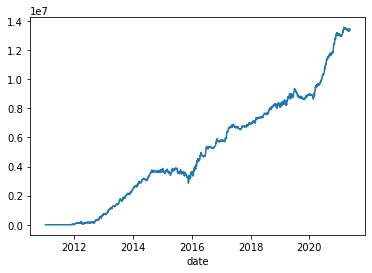

                            0
sharp_ratio_10y      2.190734
sharp_ratio_1y       4.919521
sharp_ratio_2y       3.176617
sharp_ratio_3y       2.699665
sharp_ratio_4y       2.436696
sharp_ratio_5y       2.649569
sharp_ratio_6y       2.256161
sharp_ratio_8y       2.266225
std_pnl_10y      39873.997008
std_pnl_1y       46625.962329
std_pnl_2y       46140.027033
std_pnl_3y       48014.382486
std_pnl_4y       44216.668237
std_pnl_5y       42546.707245
std_pnl_6y       46401.503508
std_pnl_8y       43572.323340
corr for sim_name = tscarry
          0         1
0  1.000000  0.654422
1  0.654422  1.000000
combined pnl for sim_name = tscarry


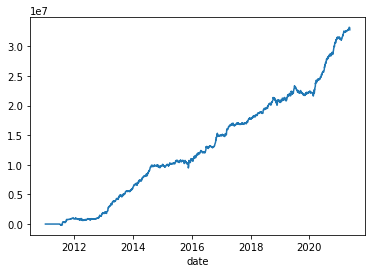

                             0
sharp_ratio_10y       2.673377
sharp_ratio_1y        5.186531
sharp_ratio_2y        3.390042
sharp_ratio_3y        2.962676
sharp_ratio_4y        2.761505
sharp_ratio_5y        2.958002
sharp_ratio_6y        2.646128
sharp_ratio_8y        2.741584
std_pnl_10y       80092.616904
std_pnl_1y        99813.492375
std_pnl_2y       103266.007311
std_pnl_3y       102919.217917
std_pnl_4y        94060.720079
std_pnl_5y        91044.440556
std_pnl_6y        92493.282214
std_pnl_8y        86086.786432
sim_name = xscarry, run_mode = ryieldsma


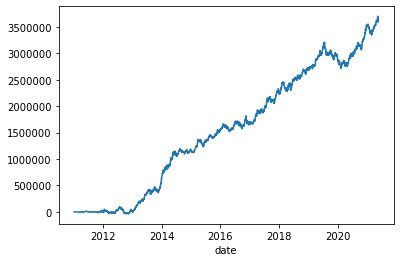

                            0
sharp_ratio_10y      1.622772
sharp_ratio_1y       2.389700
sharp_ratio_2y       1.078458
sharp_ratio_3y       1.492822
sharp_ratio_4y       1.527421
sharp_ratio_5y       1.530613
sharp_ratio_6y       1.526687
sharp_ratio_8y       1.733988
std_pnl_10y      14469.639942
std_pnl_1y       18995.706056
std_pnl_2y       19162.236750
std_pnl_3y       17988.358327
std_pnl_4y       17838.076587
std_pnl_5y       17267.523023
std_pnl_6y       16476.165487
std_pnl_8y       15844.206424
sim_name = xscarry, run_mode = ryieldnma


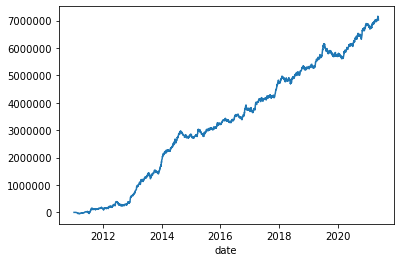

                            0
sharp_ratio_10y      2.010671
sharp_ratio_1y       2.084796
sharp_ratio_2y       1.605796
sharp_ratio_3y       1.865586
sharp_ratio_4y       1.818256
sharp_ratio_5y       1.858930
sharp_ratio_6y       1.828717
sharp_ratio_8y       1.954105
std_pnl_10y      22751.467461
std_pnl_1y       28189.682189
std_pnl_2y       28128.991190
std_pnl_3y       26695.712399
std_pnl_4y       25983.501436
std_pnl_5y       25805.255492
std_pnl_6y       24791.125734
std_pnl_8y       24337.828637
sim_name = xscarry, run_mode = basmomsma


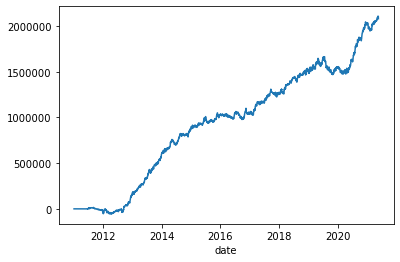

                           0
sharp_ratio_10y     1.796286
sharp_ratio_1y      3.544847
sharp_ratio_2y      1.648227
sharp_ratio_3y      1.531421
sharp_ratio_4y      1.614620
sharp_ratio_5y      1.572727
sharp_ratio_6y      1.472608
sharp_ratio_8y      1.809333
std_pnl_10y      7561.795043
std_pnl_1y       9820.514671
std_pnl_2y       9696.983517
std_pnl_3y       9743.958597
std_pnl_4y       9258.706080
std_pnl_5y       8947.310067
std_pnl_6y       8575.853732
std_pnl_8y       8143.400087
sim_name = xscarry, run_mode = basmomnma


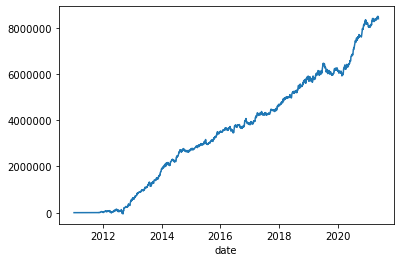

                            0
sharp_ratio_10y      2.153028
sharp_ratio_1y       3.881744
sharp_ratio_2y       2.368075
sharp_ratio_3y       2.155889
sharp_ratio_4y       2.107350
sharp_ratio_5y       2.059744
sharp_ratio_6y       2.015479
sharp_ratio_8y       2.198759
std_pnl_10y      25452.393239
std_pnl_1y       32570.111411
std_pnl_2y       32875.294898
std_pnl_3y       33890.805101
std_pnl_4y       31630.721840
std_pnl_5y       30509.516467
std_pnl_6y       29423.827468
std_pnl_8y       27529.543910
corr for sim_name = xscarry
          0         1        2         3
0  1.000000  0.757957  0.51910  0.515584
1  0.757957  1.000000  0.55966  0.624469
2  0.519100  0.559660  1.00000  0.813970
3  0.515584  0.624469  0.81397  1.000000
combined pnl for sim_name = xscarry


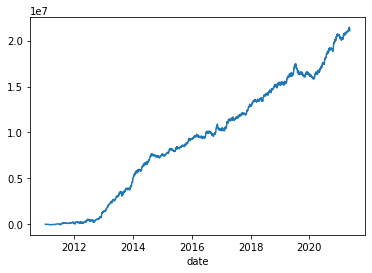

                            0
sharp_ratio_10y      2.304123
sharp_ratio_1y       3.447426
sharp_ratio_2y       2.035293
sharp_ratio_3y       2.140264
sharp_ratio_4y       2.167799
sharp_ratio_5y       2.132050
sharp_ratio_6y       2.095062
sharp_ratio_8y       2.312555
std_pnl_10y      59723.164658
std_pnl_1y       76986.378186
std_pnl_2y       78450.176892
std_pnl_3y       76926.709470
std_pnl_4y       72007.220556
std_pnl_5y       70970.926400
std_pnl_6y       67979.787784
std_pnl_8y       64991.879610
sim_name = tsmom, run_mode = momnma


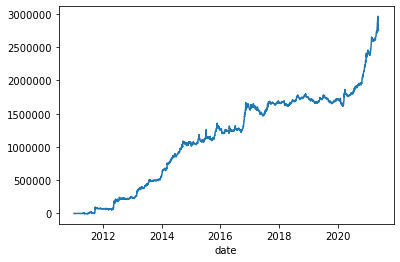

                            0
sharp_ratio_10y      1.577362
sharp_ratio_1y       3.353595
sharp_ratio_2y       2.181698
sharp_ratio_3y       1.789657
sharp_ratio_4y       1.624414
sharp_ratio_5y       1.540888
sharp_ratio_6y       1.391095
sharp_ratio_8y       1.586365
std_pnl_10y      11388.117192
std_pnl_1y       18766.094039
std_pnl_2y       15513.512183
std_pnl_3y       13224.667230
std_pnl_4y       12350.174319
std_pnl_5y       12671.003533
std_pnl_6y       12914.254915
std_pnl_8y       12166.308413
sim_name = tsmom, run_mode = hlbrk


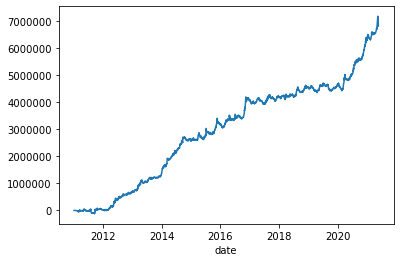

                            0
sharp_ratio_10y      1.893705
sharp_ratio_1y       3.507045
sharp_ratio_2y       2.452031
sharp_ratio_3y       2.062059
sharp_ratio_4y       1.740305
sharp_ratio_5y       1.722474
sharp_ratio_6y       1.729028
sharp_ratio_8y       1.911868
std_pnl_10y      23452.565893
std_pnl_1y       35997.287373
std_pnl_2y       30145.808461
std_pnl_3y       26592.105958
std_pnl_4y       25868.524559
std_pnl_5y       26111.858146
std_pnl_6y       26023.225686
std_pnl_8y       24686.929642
sim_name = tsmom, run_mode = macdnma


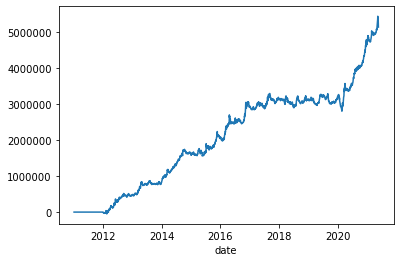

                            0
sharp_ratio_10y      1.485991
sharp_ratio_1y       3.474379
sharp_ratio_2y       2.153825
sharp_ratio_3y       1.696128
sharp_ratio_4y       1.347323
sharp_ratio_5y       1.324006
sharp_ratio_6y       1.468965
sharp_ratio_8y       1.484666
std_pnl_10y      22588.867702
std_pnl_1y       32408.124362
std_pnl_2y       30166.398694
std_pnl_3y       26748.390486
std_pnl_4y       26286.898242
std_pnl_5y       26027.068961
std_pnl_6y       26154.120057
std_pnl_8y       24078.188423
corr for sim_name = tsmom
          0         1         2
0  1.000000  0.801541  0.696898
1  0.801541  1.000000  0.925108
2  0.696898  0.925108  1.000000
combined pnl for sim_name = tsmom


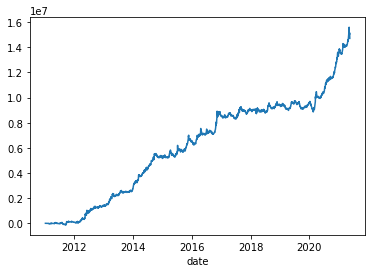

                            0
sharp_ratio_10y      1.765698
sharp_ratio_1y       3.546109
sharp_ratio_2y       2.377148
sharp_ratio_3y       1.949755
sharp_ratio_4y       1.635775
sharp_ratio_5y       1.608040
sharp_ratio_6y       1.640986
sharp_ratio_8y       1.767830
std_pnl_10y      54336.730712
std_pnl_1y       85100.627755
std_pnl_2y       72665.818286
std_pnl_3y       63531.460659
std_pnl_4y       61437.444473
std_pnl_5y       61541.726040
std_pnl_6y       61779.500383
std_pnl_8y       57837.258243
sim_name = xsmom, run_mode = hlbrk


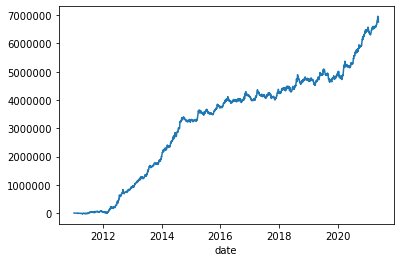

                            0
sharp_ratio_10y      1.932279
sharp_ratio_1y       3.453563
sharp_ratio_2y       2.165156
sharp_ratio_3y       1.869806
sharp_ratio_4y       1.556737
sharp_ratio_5y       1.389421
sharp_ratio_6y       1.381210
sharp_ratio_8y       1.829412
std_pnl_10y      22902.589118
std_pnl_1y       29230.489806
std_pnl_2y       28991.794277
std_pnl_3y       27711.904063
std_pnl_4y       26956.505833
std_pnl_5y       26447.296591
std_pnl_6y       25360.183943
std_pnl_8y       24573.132755
sim_name = xsmom, run_mode = mom


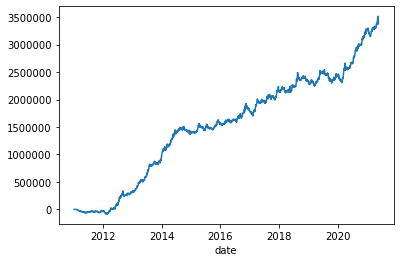

                            0
sharp_ratio_10y      1.722207
sharp_ratio_1y       3.038458
sharp_ratio_2y       1.898334
sharp_ratio_3y       1.645911
sharp_ratio_4y       1.498589
sharp_ratio_5y       1.496540
sharp_ratio_6y       1.394221
sharp_ratio_8y       1.659752
std_pnl_10y      13028.611161
std_pnl_1y       16991.748302
std_pnl_2y       16279.010128
std_pnl_3y       15532.390713
std_pnl_4y       15276.652106
std_pnl_5y       15398.308361
std_pnl_6y       14660.922909
std_pnl_8y       14029.996508
sim_name = xsmom, run_mode = momnma


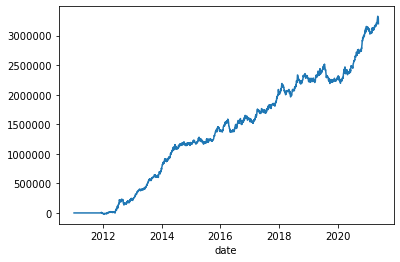

                            0
sharp_ratio_10y      1.594815
sharp_ratio_1y       2.927165
sharp_ratio_2y       1.593216
sharp_ratio_3y       1.568812
sharp_ratio_4y       1.490971
sharp_ratio_5y       1.508696
sharp_ratio_6y       1.406038
sharp_ratio_8y       1.591201
std_pnl_10y      13116.081608
std_pnl_1y       18229.544542
std_pnl_2y       17359.681462
std_pnl_3y       16610.814727
std_pnl_4y       16243.235721
std_pnl_5y       15787.563431
std_pnl_6y       15235.514353
std_pnl_8y       14317.123122
sim_name = xsmom, run_mode = momsma


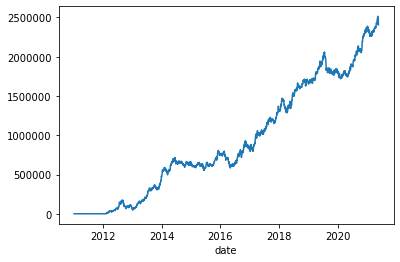

                            0
sharp_ratio_10y      1.381032
sharp_ratio_1y       2.576011
sharp_ratio_2y       1.133635
sharp_ratio_3y       1.539595
sharp_ratio_4y       1.574631
sharp_ratio_5y       1.671138
sharp_ratio_6y       1.433597
sharp_ratio_8y       1.459944
std_pnl_10y      11382.749276
std_pnl_1y       15059.476270
std_pnl_2y       15109.217820
std_pnl_3y       14322.378709
std_pnl_4y       14061.100755
std_pnl_5y       14006.110885
std_pnl_6y       13395.247568
std_pnl_8y       12484.532901
corr for sim_name = xsmom
          0         1         2         3
0  1.000000  0.874129  0.758634  0.533013
1  0.874129  1.000000  0.765563  0.658017
2  0.758634  0.765563  1.000000  0.800726
3  0.533013  0.658017  0.800726  1.000000
combined pnl for sim_name = xsmom


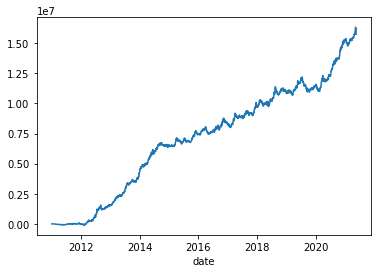

                            0
sharp_ratio_10y      1.917147
sharp_ratio_1y       3.378133
sharp_ratio_2y       1.991873
sharp_ratio_3y       1.884086
sharp_ratio_4y       1.706089
sharp_ratio_5y       1.656210
sharp_ratio_6y       1.563352
sharp_ratio_8y       1.870618
std_pnl_10y      53897.704063
std_pnl_1y       72446.019706
std_pnl_2y       69512.856984
std_pnl_3y       66605.620457
std_pnl_4y       65188.186470
std_pnl_5y       64614.648492
std_pnl_6y       61466.268982
std_pnl_8y       58402.529268
          0         1         2         3
0  1.000000  0.722790  0.424397  0.565762
1  0.722790  1.000000  0.267182  0.708411
2  0.424397  0.267182  1.000000  0.522780
3  0.565762  0.708411  0.522780  1.000000
combined pnl for sim_name = xsmom


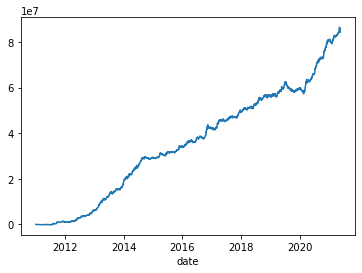

                             0
sharp_ratio_10y       2.821843
sharp_ratio_1y        4.644274
sharp_ratio_2y        3.000326
sharp_ratio_3y        2.770988
sharp_ratio_4y        2.577954
sharp_ratio_5y        2.653693
sharp_ratio_6y        2.608491
sharp_ratio_8y        2.817603
std_pnl_10y      195262.212229
std_pnl_1y       286287.813862
std_pnl_2y       273618.062965
std_pnl_3y       259445.792780
std_pnl_4y       243433.790370
std_pnl_5y       236123.800174
std_pnl_6y       224130.994424
std_pnl_8y       212168.511027


In [21]:
cum_df = pd.concat(cum_list, axis = 1)
cum_df.to_csv(save_loc + 'pnl.csv')
stats_df = pd.concat(stats_list, axis = 1)
stats_df.T.to_csv(save_loc + 'stats.csv')
if run_pos_sum:    
    print(pos_sum)

cutoff_date = datetime.date(2016,1,1)

dpnl_cutoff = []
for dpnl in dpnl_by_scen:
    dpnl_cutoff.append(dpnl[dpnl.index >= cutoff_date])

combo_dpnl = pd.concat(dpnl_cutoff, axis = 1)
combo_dpnl.columns = [ '_'.join([scen[0], scen[1], str(idx)]) for idx, scen in enumerate(scenarios)]
    
combo_dpnl.corr().to_csv(file_folder + "port_corr.csv")
pnl_dict = {}    
for idx, (scen, dpnl) in enumerate(zip(scenarios, dpnl_by_scen)):    
    if scen[0] not in pnl_dict:
        pnl_dict[scen[0]] = {}
    if scen[1] not in pnl_dict[scen[0]]:
        pnl_dict[scen[0]][scen[1]] = pd.Series()
    pnl_dict[scen[0]][scen[1]] = pnl_dict[scen[0]][scen[1]].add(dpnl * scen[2], fill_value = 0)

pnl_by_sim = []
for sim_name in pnl_dict:
    pnl_list = []
    for run_mode in pnl_dict[sim_name]:
        print("sim_name = %s, run_mode = %s" % (sim_name, run_mode))
        pnl_list.append(pnl_dict[sim_name][run_mode])
        cpnl = pnl_dict[sim_name][run_mode].cumsum()        
        cpnl.plot()
        plt.show()
        res_pnl = backtest.pnl_stats_by_tenor(pnl_dict[sim_name][run_mode].dropna(), tenors = pnl_tenors, field = None)
        vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
        vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
        print(vdf)            
    print("corr for sim_name = %s" % sim_name)
    xdf = pd.concat(pnl_list, axis = 1)
    tdf = xdf[xdf.index >= cutoff_date]
    print(tdf.corr())
    print("combined pnl for sim_name = %s" % sim_name)
    adf = xdf.sum(axis=1)
    pnl_by_sim.append(adf)
    adf.cumsum().plot()
    plt.show()
    res_pnl = backtest.pnl_stats_by_tenor(adf.dropna(), tenors = pnl_tenors, field = None)
    vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
    vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
    print(vdf)
xdf = pd.concat(pnl_by_sim, axis = 1)
tdf = xdf[xdf.index >= cutoff_date]
print(tdf.corr())
print("combined pnl for sim_name = %s" % sim_name)
adf = xdf.sum(axis=1)
pnl_by_sim.append(adf)
adf.cumsum().plot()
plt.show()
res_pnl = backtest.pnl_stats_by_tenor(adf.dropna(), tenors = pnl_tenors, field = None)
vdf = pd.DataFrame.from_dict(res_pnl, orient='index').sort_index()
vdf = vdf.loc[[idx for idx in vdf.index if ('sharp' in idx) or ('std' in idx)], :]
print(vdf)

In [13]:
save_xl = True
if run_pos_sum and save_xl:
    xlfile = save_loc + "pos_data.xlsx"
    writer = pd.ExcelWriter(xlfile)
    for idx in range(len(pos_list)):            
        pos_list[idx].to_excel(writer, str(idx), startcol= 0, startrow=1)
    pos_sum.to_excel(writer, "sum", startcol= 0, startrow=1)
    writer.save()    


In [9]:
print(df)

           index  rb1-open  rb1-high  rb1-low  rb1-close  rb1-volume  \
0     2011-01-04    2373.0    2386.0   2348.0     2365.0      275428   
1     2011-01-05    2343.0    2360.0   2332.0     2336.0      214902   
2     2011-01-06    2349.0    2368.0   2345.0     2352.0      186136   
3     2011-01-07    2343.0    2371.0   2320.0     2336.0      369032   
4     2011-01-10    2344.0    2394.0   2344.0     2377.0      436038   
...          ...       ...       ...      ...        ...         ...   
2499  2021-04-19    5122.0    5143.0   5058.0     5082.0     2509136   
2500  2021-04-20    5091.0    5171.0   5070.0     5165.0     2137195   
2501  2021-04-21    5158.0    5189.0   5125.0     5188.0     2026507   
2502  2021-04-22    5195.0    5238.0   5175.0     5208.0     2569897   
2503  2021-04-23    5225.0    5300.0   5205.0     5299.0     2115301   

      rb1-openInterest rb1-contract  rb1-shift  rb1-contmth  ...  AP2-open  \
0               576934       rb1105    -2457.0       2011